In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# Reading the CSV file

In [217]:
df = pd.read_csv("spam_ham_dataset.csv")

In [218]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [220]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [221]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [222]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [223]:
df = df[["label","text"]]

In [224]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


# Checking an example of text

In [225]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

# Preprocessing the text

In [226]:
nlp = spacy.load("en_core_web_sm")

In [229]:
def preprocess(texts):
    doc = nlp(texts)
    
    new_sent = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.like_num and not token.is_space]
    return " ".join(new_sent)

In [230]:
df["new_text"] = df["text"].apply(preprocess)

In [231]:
type(df['new_text'][0])

str

In [232]:
df['new_text'][0]

'Subject enron methanol meter follow note gave monday preliminary flow data provided daren override pop s daily volume presently reflect daily activity obtain gas control change needed asap economics purposes'

In [233]:
df.head()

,label,text,new_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,Subject enron methanol meter follow note gave ...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",Subject hpl nom january attached file hplnol x...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",Subject neon retreat ho ho ho wonderful time y...
3,spam,"Subject: photoshop , windows , office . cheap ...",Subject photoshop windows office cheap main tr...
4,ham,Subject: re : indian springs\r\nthis deal is t...,Subject indian springs deal book teco pvr reve...


In [234]:
X = df["new_text"]
y = df["label"]

# 

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [236]:
X_train.shape

(4136,)

# a) SVC

In [237]:
operations = [("tfidf",TfidfVectorizer()),("svc",SVC())]

In [238]:
pipe = Pipeline(operations)

In [239]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [240]:
y_pred = pipe.predict(X_test)

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       735
        spam       0.97      0.99      0.98       300

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



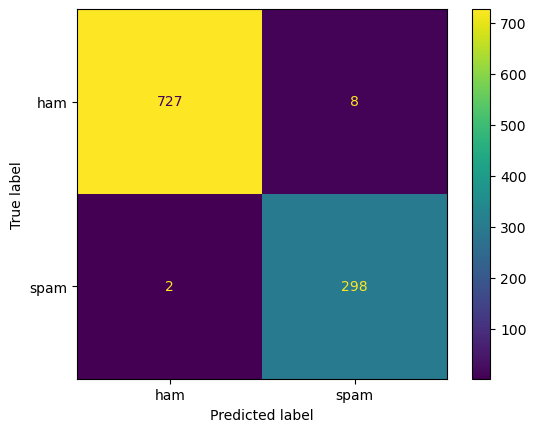

In [241]:
print(classification_report(y_test,y_pred))
d = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=pipe.classes_)
d.plot();

In [242]:
pipe.predict(result)

array(['spam'], dtype=object)

# b) Random Forest

In [243]:
operations = [("tf_idf",TfidfVectorizer()),("rf",RandomForestClassifier())]

In [244]:
new_pipe = Pipeline(operations)

In [245]:
new_pipe.fit(X_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('rf', RandomForestClassifier())])

In [246]:
y_pred = new_pipe.predict(X_test)

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       735
        spam       0.96      0.97      0.97       300

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



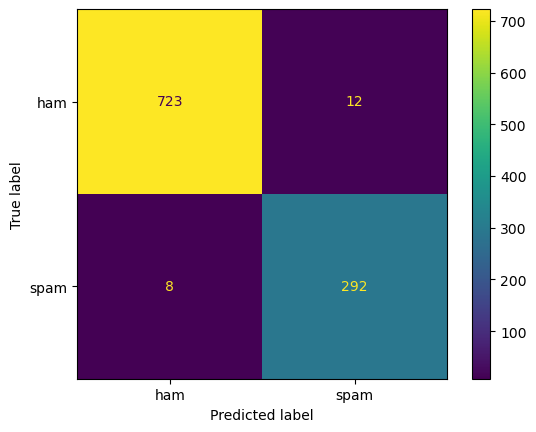

In [247]:
print(classification_report(y_test,y_pred))
d = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=new_pipe.classes_)
d.plot();

# 1) checking a new email whether it is spam or not . we know it's a spam mail

In [248]:
doc = nlp("We've updated our login credential policy. Please confirm your account by logging into Google Docs")

a = " "
new_sent = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.like_num and not token.is_space]
result = a.join(new_sent)

## First ,we do the preprocessing 

In [249]:
result

'updated login credential policy confirm account logging Google Docs'

In [250]:
type(X_test)

pandas.core.series.Series

## We see that , X_test is of type pandas Series ,so we convert the "result" to Pandas Series

In [251]:
result = pd.Series(result)

In [252]:
type(result)

pandas.core.series.Series

In [253]:
new_pipe.predict(result)

array(['spam'], dtype=object)

# Random Forest model predicted it correctly

# c) KNN

In [254]:
knn_pipe = Pipeline([("tf_idf",TfidfVectorizer()),("knn",KNeighborsClassifier())])

In [255]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()), ('knn', KNeighborsClassifier())])

In [256]:
y_pred = knn_pipe.predict(X_test)

              precision    recall  f1-score   support

         ham       0.96      0.99      0.98       735
        spam       0.98      0.91      0.94       300

    accuracy                           0.97      1035
   macro avg       0.97      0.95      0.96      1035
weighted avg       0.97      0.97      0.97      1035



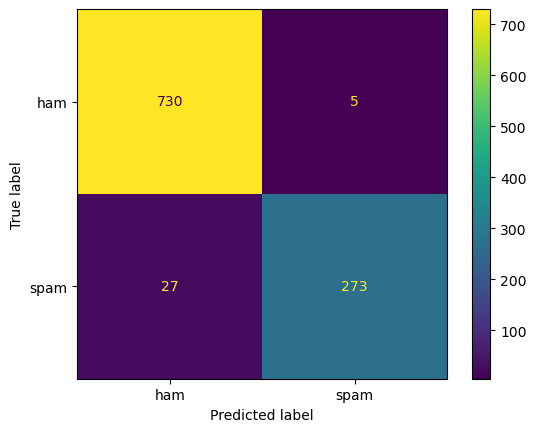

In [257]:
print(classification_report(y_test,y_pred))
d = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=knn_pipe.classes_)
d.plot();

In [258]:
knn_pipe.predict(result)

array(['ham'], dtype=object)

# d) Multinomial Naive Bayes

In [259]:
operations = [("tf_idf",TfidfVectorizer()),("nb",MultinomialNB())]

In [260]:
multi_nb_pipe = Pipeline(operations)

In [261]:
multi_nb_pipe.fit(X_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [262]:
y_pred = multi_nb_pipe.predict(X_test)

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       735
        spam       1.00      0.73      0.84       300

    accuracy                           0.92      1035
   macro avg       0.95      0.86      0.89      1035
weighted avg       0.93      0.92      0.92      1035



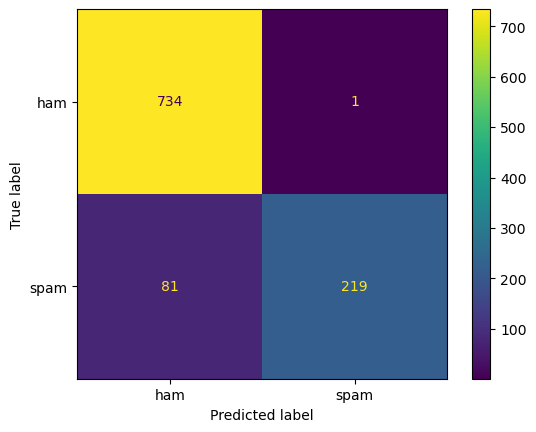

In [263]:
print(classification_report(y_test,y_pred))
d = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=multi_nb_pipe.classes_)
d.plot();

# Multinomial NB has the worst performance , in case of identifying Spam mails

In [264]:
multi_nb_pipe.predict(result)

array(['ham'], dtype='<U4')

# e) Logistic Regression model

In [265]:
operations = [("tf_idf",TfidfVectorizer()),("lr",LogisticRegressionCV())]

In [266]:
lr_pipe = Pipeline(operations) 

In [267]:
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()), ('lr', LogisticRegressionCV())])

In [268]:
y_pred = lr_pipe.predict(X_test)

In [269]:
y_test[:25]

1039     ham
893      ham
4616    spam
1905    spam
2026     ham
1135     ham
3100     ham
1619     ham
1790     ham
1188     ham
4103    spam
2336    spam
2785     ham
4188    spam
977     spam
2906    spam
4666     ham
679      ham
5033     ham
212      ham
79       ham
2683    spam
4309     ham
5166     ham
972     spam
Name: label, dtype: object

In [270]:
y_pred[:25]

array(['ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam'], dtype=object)

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99       735
        spam       0.97      1.00      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035



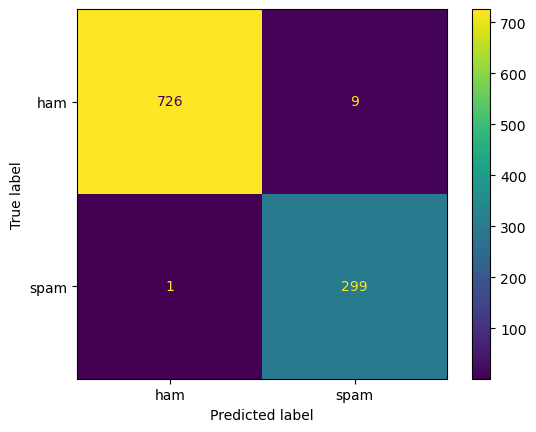

In [271]:
print(classification_report(y_test,y_pred))
d = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=lr_pipe.classes_)
d.plot();

In [272]:
lr_pipe.predict(result)

array(['spam'], dtype=object)

# f) Gradient Boosting

In [273]:
operations = [("tf_idf",TfidfVectorizer()),("gb",GradientBoostingClassifier())]

In [274]:
gb_pipe = Pipeline(operations) 

In [275]:
gb_pipe.fit(X_train,y_train)

Pipeline(steps=[('tf_idf', TfidfVectorizer()),
                ('gb', GradientBoostingClassifier())])

In [185]:
y_pred = gb_pipe.predict(X_test)

              precision    recall  f1-score   support

         ham       0.96      0.98      0.97       735
        spam       0.94      0.90      0.92       300

    accuracy                           0.95      1035
   macro avg       0.95      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



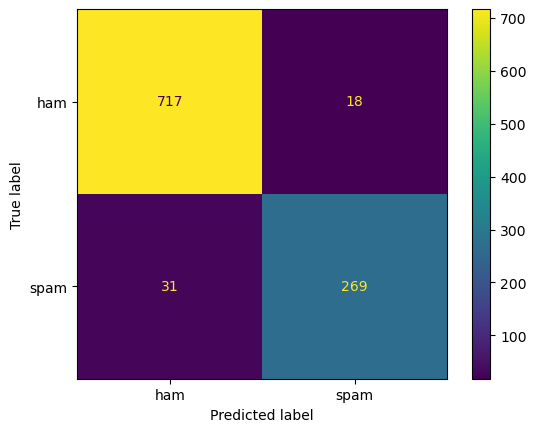

In [199]:
print(classification_report(y_test,y_pred))
d = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=gb_pipe.classes_)
d.plot();

# 2) Let's check another spam mail to check our model 

In [189]:
doc = nlp("Hello Dave. Your subscription expires 05/06. Text “SUB” to 7788 to activate the same plan and rollover unused coupons. To unsubscribe, text “UNSUB” to 7788")
a = " "
new_txt = [token.text for token in doc if not token.is_punct and not token.is_stop and not token.is_space]
b = a.join(new_txt)

In [190]:
type(b)

str

In [191]:
b = pd.Series(b) 

In [192]:
type(b)

pandas.core.series.Series

In [193]:
lr_pipe.predict(b) # Logistic Reg

array(['spam'], dtype=object)

In [194]:
knn_pipe.predict(b) # KNN classifier

array(['ham'], dtype=object)

In [195]:
pipe.predict(b) # SVC

array(['spam'], dtype=object)

In [196]:
gb_pipe.predict(b)  # Grad Boosting 

array(['spam'], dtype=object)

In [197]:
new_pipe.predict(b)  # Random Forest

array(['spam'], dtype=object)

In [198]:
multi_nb_pipe.predict(b) # Multi Naive Bayes

array(['ham'], dtype='<U4')